# Aarav Gosalia

## Research question/interests
**How has literacy rate changed in different region groups and countries and what could be some reasons for the changes**

Briefly describe your research question or interests here.

I have used lineplots to show how countries with 3 or more years of data recording's literacy rate has changed. There are also two barplots showing the percentage change of literacy rates in those countries and the average percentage change for each region group. I will try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions1 as pf
pd.options.mode.chained_assignment = None
sns.set_theme(style="ticks", font_scale=0.8)

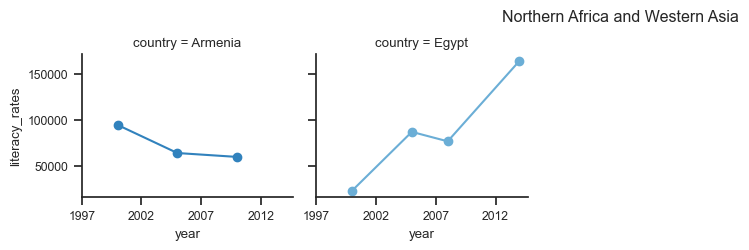

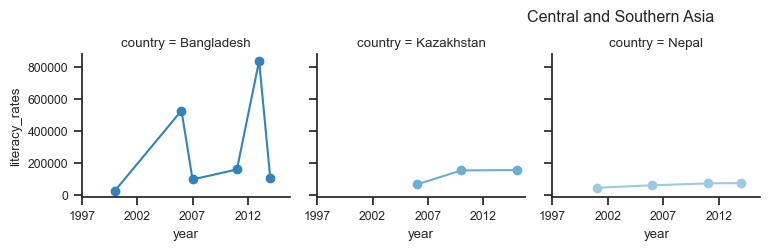

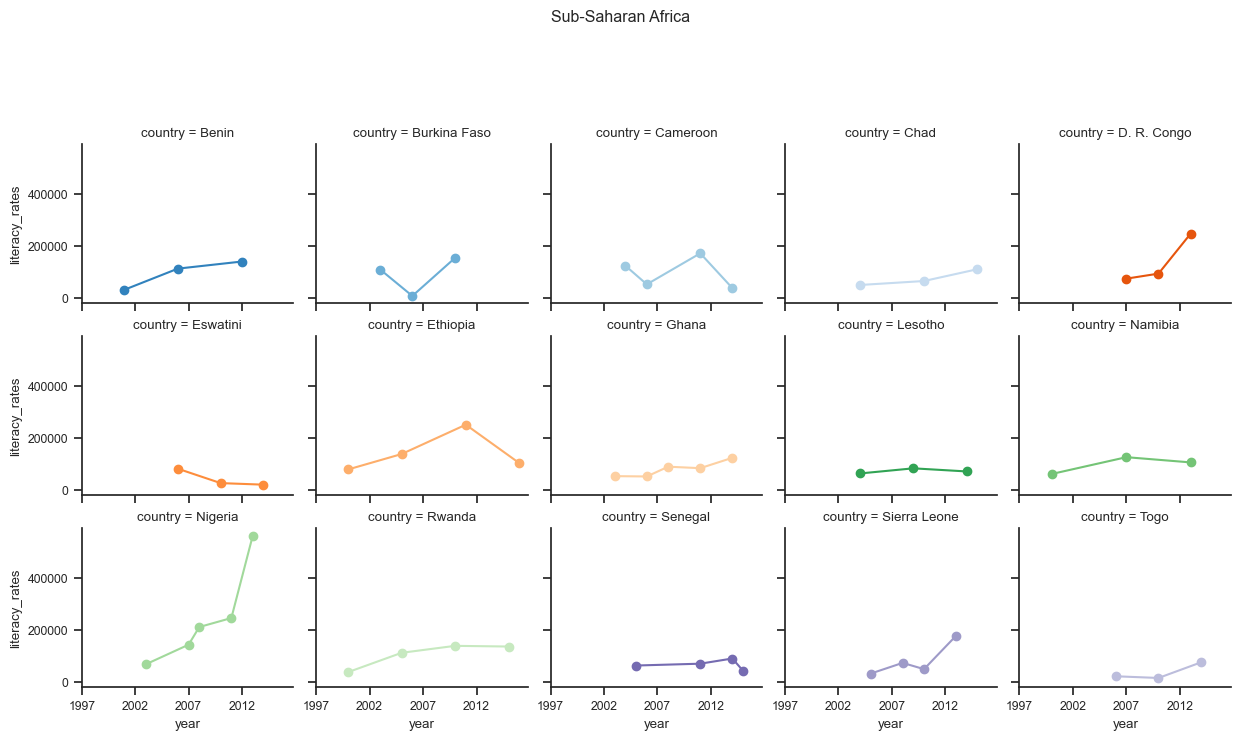

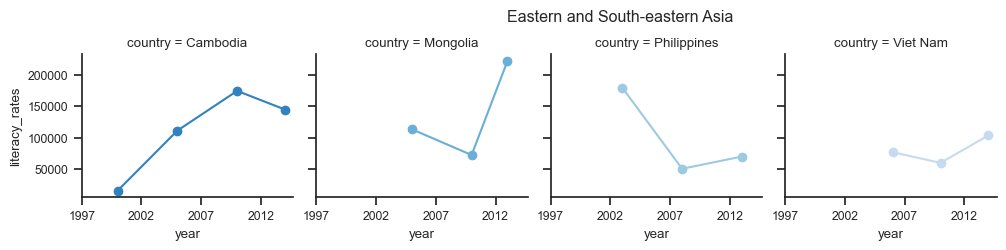

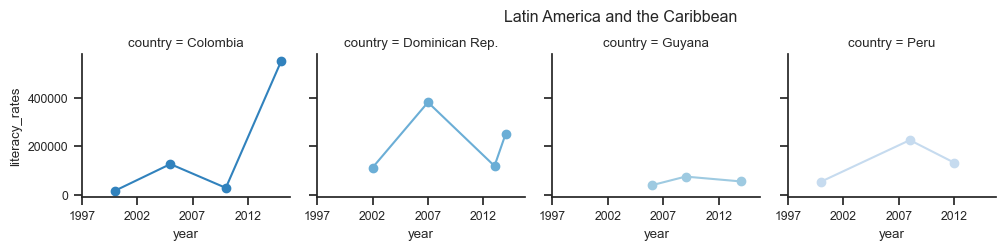

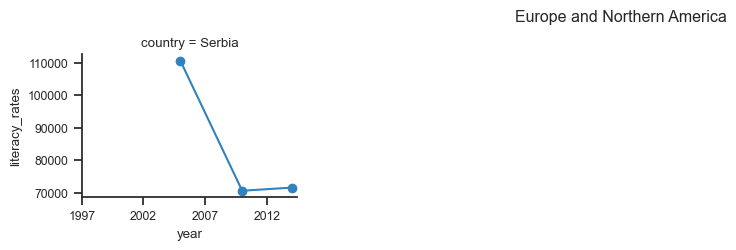

In [8]:
data_processed = pf.data_processing("../data/raw/dataset_raw.csv")
dictionary = pf.plotting(data_processed)
pf.lineplot(dictionary)

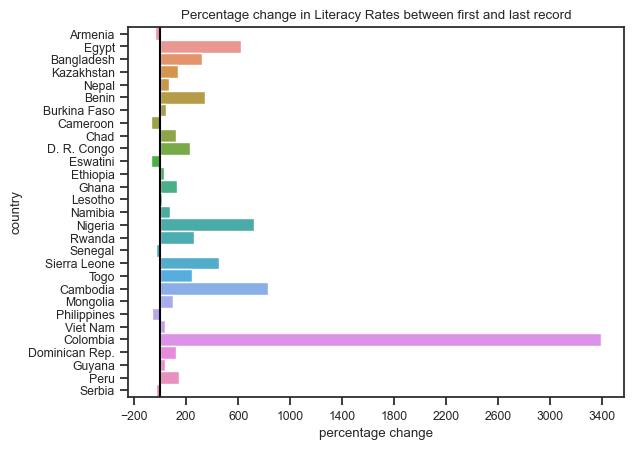

In [9]:
data_plot1,data_plot2 = pf.more_processing(dictionary)
pf.barplot1(data_plot1)

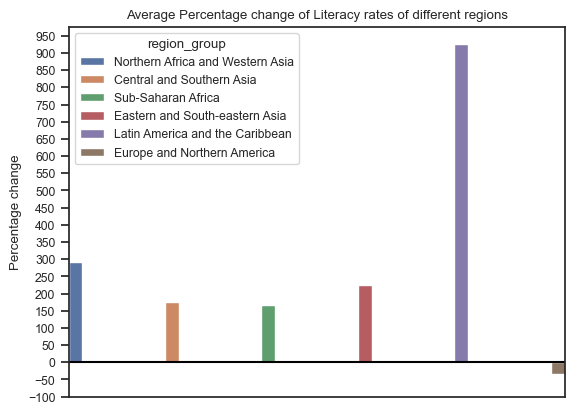

In [10]:
pf.barplot2(data_plot2)